# Formula1 Exploratory Data Analysis on Legacy Results (Ergast database) and Statistical Tests

Author : Ben Palmer\
Date : 02/11/2022

## Summary:

In this notebook we have established how important Qualifying Position is in doing well in the race. If you start outside the top 3 you only have a 15% chance of winning the race. Starting on pole gives you a 50% chance of winning. 

We have also investigated the statistically significant relationships between:
- Drivers and Poles
- Weather conditions and Poles
- Teams and poles


## Introduction:

The aim of this notebook is the explore the legacy results Ergast database that was combined and cleaned in [1_Formula1_Ergast_database_combination](./1_Formula1_Ergast_database_combination.ipynb)

This analysis will see if there are relationships between Drivers, Team, Circuits and Weather and the target of Qualifying Position.


## Table of Contents:

1. [Load Ergast Data](#load)\
    1.1 [Data Dictionary](#dict)\
    1.2 [Pole Position Label](#pole)

2. [All time Drivers Pole Positions](#alltime)

3. [Relationship between grid position and race result](#grid2race)

4. [Relationship between Drivers and Weather](#weather)

5. [Relationship between Teams and Poles](#teams)

6. [Summary](#sum)

7. [Next Steps](#nextsteps)

8. [Appendix](#appendix)\
    7.1 [Do drivers have favourite circuits for pole positions?](#circuits)\
    7.2 [Do certain cars prefer different tracks for pole positions?](#tracks)\
    7.3 [do drivers do better in their home country?](#homecountry)\
    7.4 [Does Age matter](#age)\
    7.5 [Is there a correlation between grid and pole position?](#grid)    


## Imports

In [22]:
import pandas as pd
import numpy as np
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scripts import ds_ultils
plt.style.use('./scripts/plotstyle.mplstyle')
#plt.style.use('default')

## Load Ergast Data
<a id="load"></a>

First load the merged and cleaned database from created in [1_Formula1_Ergast_database_combination](./1_Formula1_Ergast_database_combination.ipynb)

In [3]:
ergast_combined_df=pd.read_csv('./data/clean/combined_ergast_clean.csv')

In [21]:
ergast_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9455 entries, 0 to 9454
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   raceId                        9455 non-null   int64  
 1   year                          9455 non-null   int64  
 2   circuitId                     9455 non-null   int64  
 3   name                          9455 non-null   object 
 4   date                          9455 non-null   object 
 5   time                          7227 non-null   object 
 6   quali_date                    759 non-null    object 
 7   quali_time                    320 non-null    object 
 8   sprint_date                   100 non-null    object 
 9   sprint_time                   40 non-null     object 
 10  lat_x                         9455 non-null   float64
 11  lng_x                         9455 non-null   float64
 12  race_temp                     9455 non-null   float64
 13  rac

## Data Dictionary:
<a id="dict"></a>

Data dictionary of the combined Ergast Database:

- `raceId`(float) : id of the race linked to Ergast database
- `year` (float) : year of the Grand Prix
- `circuitId` (float): id of the circuit
- `name` (float) : name of the Grand Prix
- `date` (float) : date of the qualifying session
- `time` (float) : Time of the qualifying session
- `quali_date` (object) : Date of qualifying
- `quali_time` (object) : Time of qualifying
- `sprint_date` (object) : Date of the sprint race if run
- `sprint_time` (object) : Time of the sprint race if run
- `lat_x` (float) : Latitude of the circuit
- `lng_x` (float) : Longitude of the circuit
- `race_temp` (float) : race temperature from weather api
- `race_precip` (float) : race precipitation from weather api
- `race_humidity` (float) : race humidity from weather api
- `quali_temp` (float) : qualifying temperature from weather api
- `quali_precip` (float) : qualifying precipitation from weather api
- `quali_humidity` (float) : qualifying precipitation from weather api
- `fp1_date` (object) : Date of free practice 1
- `fp1_time` (object) : Time of free practice 1
- `fp2_date`(object) : Date of free practice 2
- `fp2_time` (object) : Time of free practice 2
- `fp3_date`(object) : Date of free practice 3
- `fp3_time` (object) : Time of free practice 3
- `race_condition_wiki` (object) : Race condition from Wikipedia
- `quali_condition_clean` (object) : Qualifying condition from weather API
- `circuitRef` (object) : circuit name
- `location` (object) : Location of circuit
- `country` (object) : country name
- `alt` (float) : altitude of the circuit
- `qualifyId` (float) : id of qualifying session
- `driverId` (float) : Driver Id number
- `constructorId` (float) : Team Id number
- `quali_position` (float) : position of qualifying
- `q1` (object) : Best lap time in Q1 in minutes and seconds. 
- `q2` (object) : Best lap time in Q2 in minutes and seconds, if drivers are knocked out of Q1 recorded as NaN
- `q3` (object) : Best lap time in Q3 in minutes and seconds, if drivers are knocked out of Q2 recorded as NaN
- `resultId_x` (float): Race result Id
- `grid_sprint` (float) : Grid position for Sprint race if it occurs
- `positionText_sprint` (object) : Race position for Sprint race if it occurs as category
- `positionOrder_sprint` (float) : Race position for Sprint race if it occurs
- `points_sprint` (float) : Points awarded for sprint race
- `laps_sprint` (float) : number of laps completed in sprint race
- `milliseconds_sprint` (float) : time taken to complete sprint race
- `fastestLap_sprint` (float) : lap number of fastest lap in the sprint race
- `fastestLapTime_sprint` (float) : fastest lap time for that driver in the sprint race
- `status_sprint` (object) : status, finished, retired or crashed
- `resultId_y` (float) : result id for the final race
- `grid` (float) : grid position for race after penalities
- `positionText` (object) : Race position as category
- `positionOrder`(float) : position of race
- `points` (float) : points from race
- `laps` (float) : number of laps completed in the race
- `milliseconds` (float) : time taken to complete the race
- `fastestLap` (float) : lap number of fastest lap in the race
- `rank` (float) : rank of fastest laps 
- `fastestLapTime` (float) : fastest lap time of driver in race
- `fastestLapSpeed` (float) : average speed on fastest lap time in the race
- `status` (object) : status, finished, retired or crashed
- `driverStandingsId` (float) : driver Id for overal points standing
- `points_drivers` (float): cumulative points of the season
- `position_drivers` (float): position in drivers season standing after the race
- `wins_drivers` (float) : number of wins that season
- `constructorStandingsId`
- `points_constructors` (float) : number of points the constructors have in the standings
- `position_constructors` (float) : position in constructors standings after the race
- `wins_constructors` (float) : number of constructors wins that season
- `points_constructor_ind_races` (float) : points gained in that race constructors
- `driverRef` (object) : Name of driver
- `number` (object) : number assinged to the driver that goes on the car. e.g. Hamilton 44
- `dob` (object) : Date of Birth of driver
- `nationality_drivers` (object) : Nationality of driver
- `constructorRef` (object) : Constructor name
- `nationality_constructors` (object) : Nationality of constructors

## Create Pole Position Label
<a id="pole"></a>

For further analysis we need to create a label which is a flag for pole position. 

Pole position is the driver who qualifys first and then gets to start first on the grid, called pole position.

We can find pole position by locating the result 1 in `quali_position` and assigning at 1 and everything else a 0.

In [5]:
ergast_combined_df['pole']=ergast_combined_df['quali_position'].apply(lambda x: 1 if x ==1 else 0)

In [6]:
ergast_combined_df.columns

Index(['raceId', 'year', 'circuitId', 'name', 'date', 'time', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time', 'lat_x', 'lng_x',
       'race_temp', 'race_precip', 'race_humidity', 'quali_temp',
       'quali_precip', 'quali_humidity', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'race_condition_wiki',
       'quali_condition_clean', 'circuitRef', 'location', 'country', 'alt',
       'qualifyId', 'driverId', 'constructorId', 'quali_position', 'q1', 'q2',
       'q3', 'resultId_x', 'grid_sprint', 'positionText_sprint',
       'positionOrder_sprint', 'points_sprint', 'laps_sprint',
       'milliseconds_sprint', 'fastestLap_sprint', 'fastestLapTime_sprint',
       'status_sprint', 'resultId_y', 'grid', 'positionText', 'positionOrder',
       'points', 'laps', 'milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'status', 'driverStandingsId',
       'points_drivers', 'position_drivers', 'wins_drivers',
       'c

## Relationship between grid position and final result
<a id="grid2race"></a>

How important is qualifying? Why do we car about qualifying?

The hypothesis is that the better your qualifying or grid position the better chance you have of doing well in the race.

In this [youtube clip](https://www.youtube.com/watch?v=nqLzb6If4n0&t=16s)
Lewis Hamilton is extastic with every pole position he got. They clearly matter to him. Does the data show that they matter?


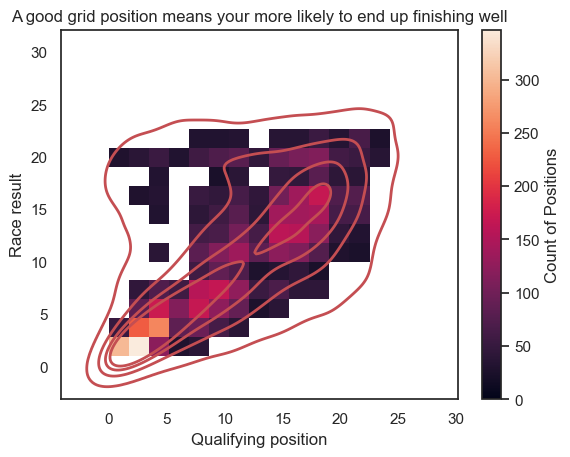

In [7]:
#sns.scatterplot(data=ergast_combined_df, x='grid',y='positionOrder', s=5, color=".15")
plt.figure()
sns.set_theme(style="white")
sns.histplot(data=ergast_combined_df, x='grid',y='positionOrder', bins=15, pthresh=.1, cmap="rocket",cbar=True,cbar_kws={'label':'Count of Positions'})
sns.kdeplot(data=ergast_combined_df, x='grid',y='positionOrder', levels=5, color="r", linewidths=2)
plt.title('A good grid position means your more likely to end up finishing well')
plt.xlabel('Qualifying position')
plt.ylabel('Race result')
plt.savefig('./images/grid_qualifying.jpg',dpi=300)
plt.show()


Here we see the two dimension historgram plot between Qualifying Position and Race Result from 1950 to Present day. The density contour lines show a strong correlation. I.e. the better your qualify the better you are likely to peform.
We can see that especially in the low order, qualifying between pole and 5th as a very high density of points, indicating you are more likely to end up finishing in the top 5.

In the lower orders beyond 10th there is more spread as drivers can follow back and do worse than they qualified, usually for the top 5 this is not the case.

Therefore qualifying well seems to matter, but by how much?

In [8]:
place_percent = (((abs(ergast_combined_df['grid'] - ergast_combined_df['positionOrder'])) <=5 ).sum()/len(ergast_combined_df))*100
print(f'{round(place_percent,0)}% time drivers finished within 5 places of their start position')

71.0% time drivers finished within 5 places of their start position


In [9]:
bin_position= ((pd.cut(ergast_combined_df['grid'],[0,5,10,15,20]) == pd.cut(ergast_combined_df['positionOrder'],[0,5,10,15,20])).sum()/len(ergast_combined_df))*100
print(f'{round(bin_position,0)}% time drivers finished in the same bin of 5 of there start')

42.0% time drivers finished in the same bin of 5 of there start


In [10]:
percent = (((ergast_combined_df['grid']==1) &  (ergast_combined_df['positionOrder']==1)).sum()/ (ergast_combined_df['grid']==1).sum())*100
print(f'{round(percent,0)}% time pole position was converted into a win')

50.0% time pole position was converted into a win


What is your chance of winning from each position on the grid from the legacy database?

In [11]:
percent_wins_from_start=[]
for i in range(1,20):
    percent_wins_from_start.append((((ergast_combined_df['grid']==i) &  (ergast_combined_df['positionOrder']==1)).sum()/ (ergast_combined_df['grid']==1).sum())*100)

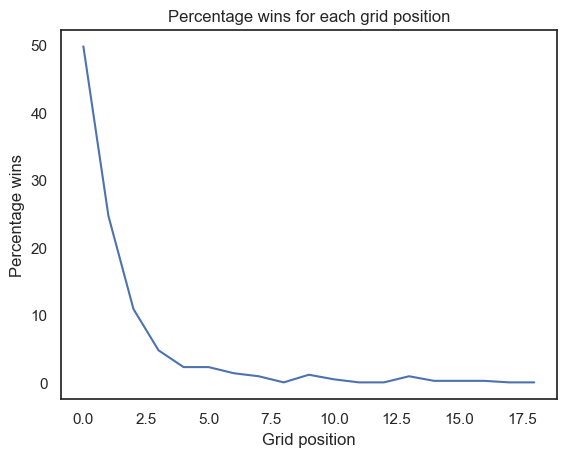

In [12]:
plt.figure()
plt.plot(percent_wins_from_start)
plt.ylabel('Percentage wins')
plt.xlabel('Grid position')
plt.title('Percentage wins for each grid position')
plt.show()

In [25]:
print(f'If you start on pole you have  a {round(percent_wins_from_start[0],0)} chance of winning the race')
print(f'If you start in 2nd you have  a {round(percent_wins_from_start[1],0)} chance of winning the race')
print(f'If you start on 3rd you have  a {round(percent_wins_from_start[2],0)} chance of winning the race')
print(f'If you start on 5th you have  a {round(percent_wins_from_start[4],0)} chance of winning the race')

If you start on pole you have  a 50.0 chance of winning the race
If you start in 2nd you have  a 25.0 chance of winning the race
If you start on 3rd you have  a 11.0 chance of winning the race
If you start on 5th you have  a 2.0 chance of winning the race


From the plot we can see that the chance a driver has to win the race rapidly falls away the further down the grid they start. Starting 1st gives them a 50% chance of winning, but starting 3rd only a 10% and outside the top 5 only a 2% chance of winning. The drivers really want to get on that front row of the grid! It does matter!

## Drivers all time pole positions 
<a id="alltime"></a>
Who got the most pole positions from 1950 to present

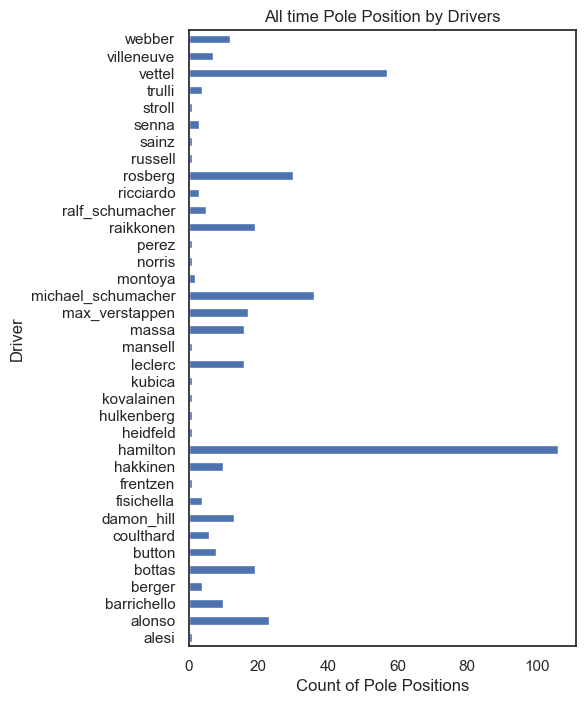

In [20]:
driver_poles = ergast_combined_df.groupby(['driverRef'])['pole'].sum()
plt.figure(figsize=(5,8))
driver_poles[driver_poles>0].plot(kind='barh')
plt.title('All time Pole Position by Drivers')
plt.ylabel('Driver')
plt.xlabel('Count of Pole Positions')
plt.show()

Hamilton, Vettel and Schumacher are the best qualifers. There are certain drivers that are great and producing a fast lap.

When looking at the percentage of races competed in Senna stands out

## Are certain drivers better in wet or dry?
<a id="weather"></a>

Are certain drivers better in difficult conditions? When it rains the tracks get slippery and driver skill matters more than car performance.

In [29]:
wet_or_dry= ergast_combined_df.groupby(['driverRef','quali_condition_clean'])['pole'].sum()
wet_or_dry_total= ergast_combined_df.groupby(['driverRef'])['pole'].sum()
wet_or_dry_total= wet_or_dry_total[wet_or_dry_total>1]
wet_or_dry_poles= wet_or_dry[wet_or_dry>1]
percent_conditions = (wet_or_dry_poles/wet_or_dry_total)*100
percent_conditions=percent_conditions.reset_index()

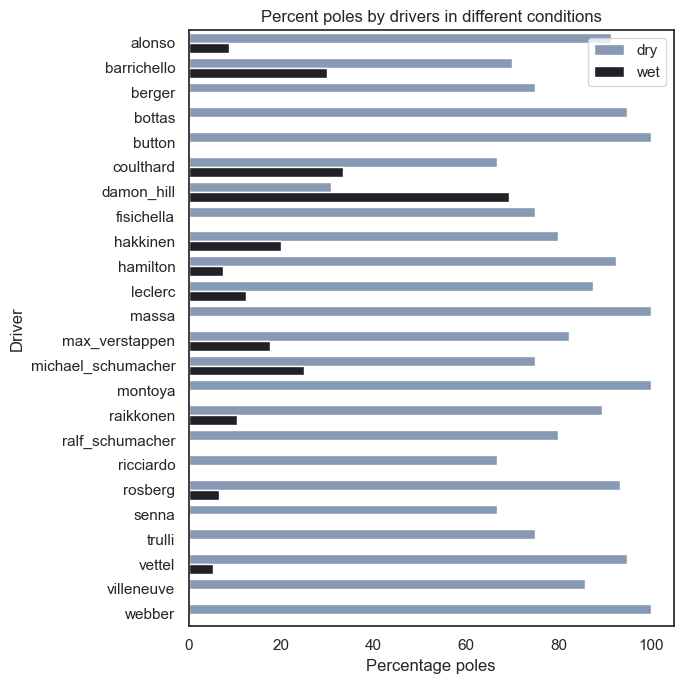

In [33]:
plt.figure(figsize=(7,7))
pal = sns.color_palette(["#7F97BB","#1F1F27"])
sns.barplot(data=percent_conditions,x='pole',y='driverRef',hue='quali_condition_clean',palette=pal)
#percent_conditions.plot(kind='barh',stacked=True)
plt.legend(loc='upper right')
plt.title('Percent poles by drivers in different conditions')
plt.ylabel('Driver')
plt.xlabel('Percentage poles')
plt.tight_layout()
plt.savefig('./images/pole_conditions.jpg',dpi=300)
plt.show()

Whilst on the whole most qualifying sessions are dry and hence this percentage is not fully representative. In is interesting to note Barrichello, Coulthard and especially Damon Hill did well in the wet and had a higher percentage of wet poles than others

### Statistical Test
Is this statistically significant?

In [107]:
drivers_wet_or_dry = wet_or_dry.unstack().T
drivers_wet_or_dry.dropna(axis=1,inplace=True)


In [108]:
drivers_temp = list(drivers_wet_or_dry.columns[drivers_wet_or_dry.all(axis=0) != 0].values)

In [109]:
drivers_wet_or_dry[drivers_temp]

driverRef,alonso,barrichello,berger,bottas,coulthard,damon_hill,fisichella,hakkinen,hamilton,leclerc,max_verstappen,michael_schumacher,raikkonen,ralf_schumacher,ricciardo,rosberg,senna,trulli,vettel,villeneuve
quali_condition_clean,,,,,,,,,,,,,,,,,,,,
dry,21.0,7.0,3.0,18.0,4.0,4.0,3.0,8.0,98.0,14.0,14.0,27.0,17.0,4.0,2.0,28.0,2.0,3.0,54.0,6.0
wet,2.0,3.0,1.0,1.0,2.0,9.0,1.0,2.0,8.0,2.0,3.0,9.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0


In [110]:
stats.chi2_contingency(drivers_wet_or_dry[drivers_temp])

(54.73047687069268,
 2.55586691596193e-05,
 19,
 array([[19.77295918,  8.59693878,  3.43877551, 16.33418367,  5.15816327,
         11.17602041,  3.43877551,  8.59693878, 91.12755102, 13.75510204,
         14.61479592, 30.94897959, 16.33418367,  4.29846939,  2.57908163,
         25.79081633,  2.57908163,  3.43877551, 49.00255102,  6.01785714],
        [ 3.22704082,  1.40306122,  0.56122449,  2.66581633,  0.84183673,
          1.82397959,  0.56122449,  1.40306122, 14.87244898,  2.24489796,
          2.38520408,  5.05102041,  2.66581633,  0.70153061,  0.42091837,
          4.20918367,  0.42091837,  0.56122449,  7.99744898,  0.98214286]]))

The CHi2 test p value is less than 0.05 therefore we can reject the null hypothesis that there is no relationship between conditions and who gets pole. Therefore there is a statistical signficant relationship between weather and pole positions

## Are certain Teams better at getiing pole positions?
<a id="teams"></a>

Is there a relationship between Teams and pole positions?

In [111]:
cons_poles = ergast_combined_df.groupby(['constructorRef'])['pole'].sum()
data=cons_poles[cons_poles>1]
data= data.reset_index()

In [112]:
stats.chisquare(data.set_index('constructorRef'))

Power_divergenceResult(statistic=array([409.82568807]), pvalue=array([1.09591121e-82]))

The CHi2 test p value is less than 0.05 therefore we can reject the null hypothesis that there is no relationship between teams and number of poles. Therefore there is a statistical signficant relationship between teams and pole positions

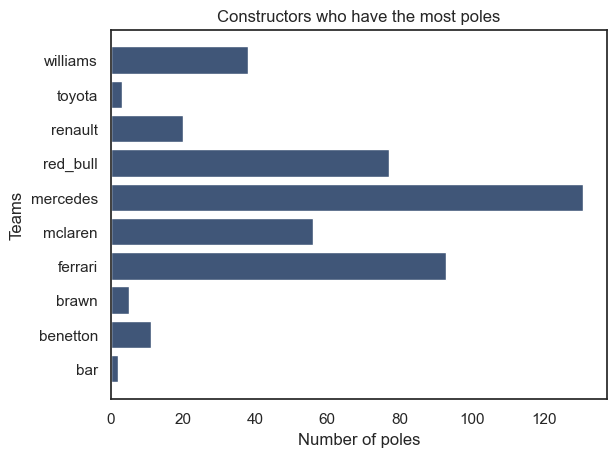

In [113]:
plt.figure()
plt.barh(y=data['constructorRef'],width=data['pole'])
plt.title('Constructors who have the most poles')
plt.xlabel('Number of poles')
plt.ylabel('Teams')
plt.show()

Mercedes have dominanted the last 8 years and therefore have the most pole positions. Ferrari have been a big team for a long time so have pole positions over multiple periods, they did especially well with Schumacher in early 2000s. Red Bull dominated in the 2010 - 2014 and Williams with Senna in the 1980s, Mclaren with Haikkon in the late 1990s. Each of these top teams have dominated for a period of time in the last 30 + years and therefore have won a significant amount of pole positions, where as other teams have not done as well.

In [114]:
total_cons =ergast_combined_df.groupby(['constructorRef'])['raceId'].count()

In [115]:
percent_cons=cons_poles/total_cons

In [116]:
percent_cons=percent_cons.reset_index()
percent_cons.rename(columns={0:'Poles'},inplace=True)


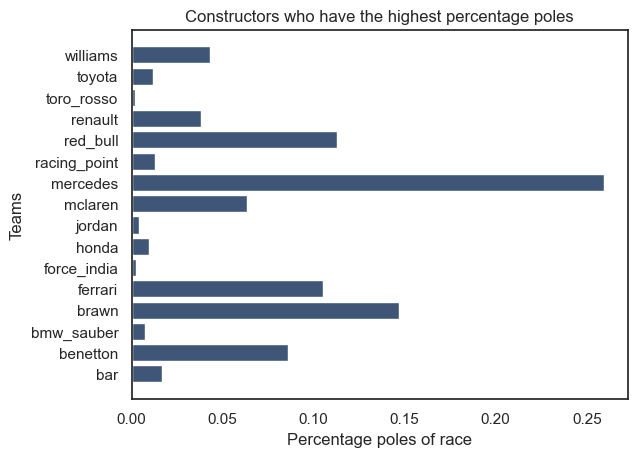

In [117]:
percent_cons.loc[percent_cons['Poles']>0,'constructorRef']
plt.figure()
plt.barh(y=percent_cons.loc[percent_cons['Poles']>0,'constructorRef'],width=percent_cons.loc[percent_cons['Poles']>0,'Poles'])
plt.title('Constructors who have the highest percentage poles')
plt.xlabel('Percentage poles of race')
plt.ylabel('Teams')
plt.show()

Mercedes as a percentage of races they competed in have done the best at 25% pole to race conversion rate.

# Summary:
<a id="sum"></a>

In this notebook we have established how important Qualifying Position is in doing well in the race. If you start outside the top 3 you only have a 15% chance of winning the race. Starting on pole gives you a 50% chance of winning. 

We have also investigated the statistically significant relationships between:
- Drivers and Poles
- Weather conditions and Poles
- Teams and poles



# Next Steps:
<a id="nextsteps"></a>

Now we have established that certain drivers and teams are good at performing well. To accurately predicting qualifying position beyond just looking at the variables of drivers and teams. We need to collect data on the car performance. Luckily there is a python package which manages a connection to the F1live database where we can download telemetry data on car performance. This will be investigated in the next notebook.


# Appendix
<a id="appendix"></a>

## Do drivers have favourite circuits for pole positions?
<a id="circuits"></a>

In [12]:
driverpoles = ergast_combined_df.groupby(['driverRef','circuitRef'])['pole'].sum()

In [13]:
driverspoles_1_more=ergast_combined_df.groupby(['driverRef'])['pole'].sum()

In [14]:
drivers = list(driverspoles_1_more[driverspoles_1_more>0].index)

In [15]:
temp = driverpoles.unstack()

In [16]:
temp

circuitRef,adelaide,albert_park,americas,bahrain,baku,buddh,catalunya,estoril,fuji,galvez,...,shanghai,silverstone,sochi,spa,suzuka,valencia,villeneuve,yas_marina,yeongam,zandvoort
driverRef,,,,,,,,,,,,,,,,,,,,,
adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
aitken,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
albers,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
albon,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0
alboreto,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yamamoto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN
yoong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
zanardi,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN


In [17]:
poles_circuits = temp[temp.index.isin(drivers)]

In [19]:
poles_circuits.columns =[ 'adelaide', 'albert_park', 'americas', 'bahrain', 'baku',
       'buddh', 'catalunya', 'estoril', 'fuji', 'galvez', 'hockenheimring',
       'hungaroring', 'imola', 'indianapolis', 'interlagos', 'istanbul',
       'jeddah', 'jerez', 'losail', 'magny_cours', 'marina_bay', 'miami',
       'monaco', 'monza', 'mugello', 'nurburgring', 'okayama', 'portimao',
       'red_bull_ring', 'ricard', 'rodriguez', 'sepang', 'shanghai',
       'silverstone', 'sochi', 'spa', 'suzuka', 'valencia', 'villeneuve',
       'yas_marina', 'yeongam', 'zandvoort']

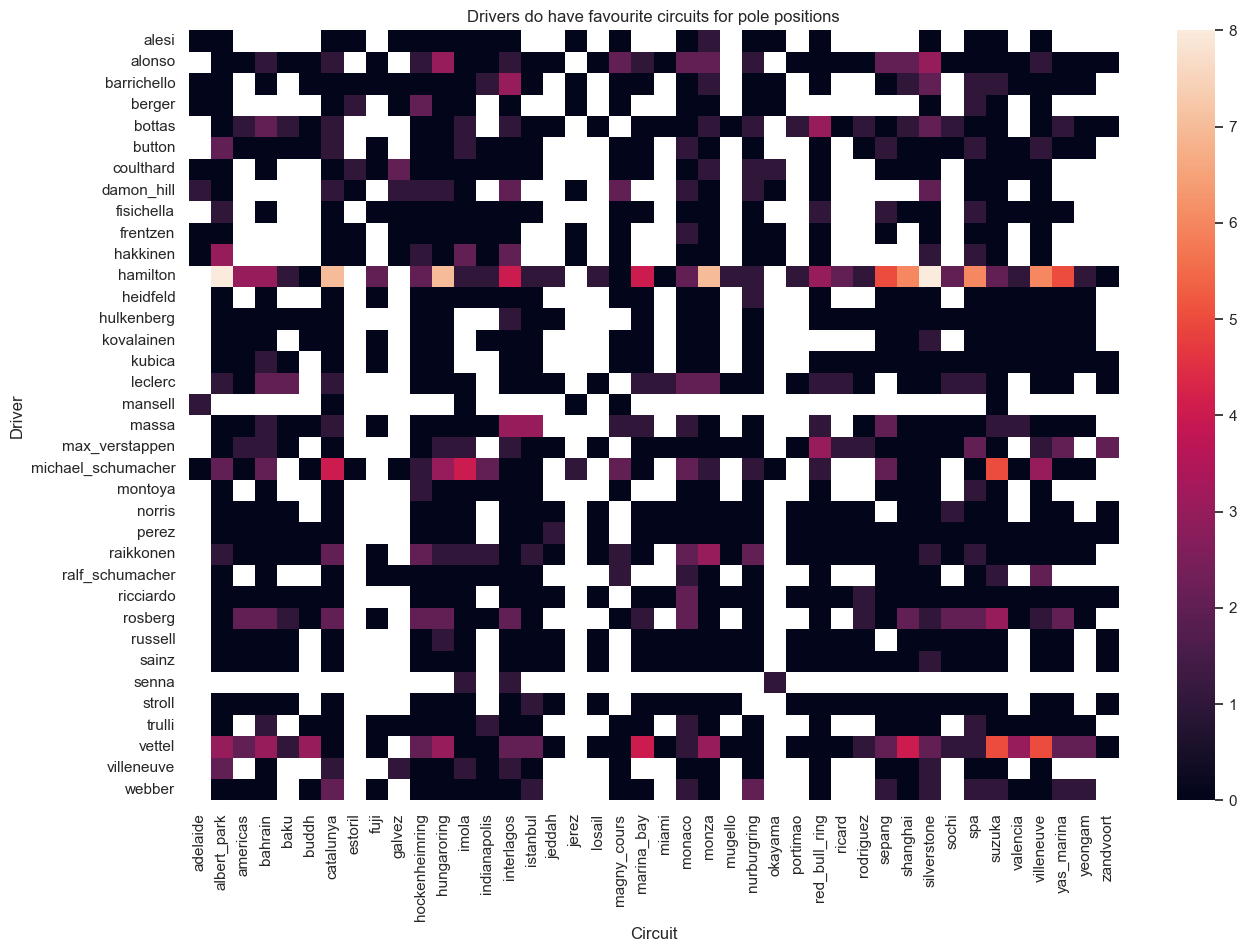

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(poles_circuits)
plt.title('Drivers do have favourite circuits for pole positions')
plt.xlabel('Circuit')
plt.ylabel('Driver')
plt.show()

In [22]:
temp2 = poles_circuits.drop(index=['senna','mansell'])
temp2 = temp2[(~temp2.isna().any(axis=0)).index]

In [23]:
cirs =list((~temp2.isna().any(axis=0)).index)
vals =list((~temp2.isna().any(axis=0)).values)
inds = [i for i,x in enumerate(vals) if x==True]
keep = [x for i,x in enumerate(cirs) if i in inds]
temp2 = temp2[keep]

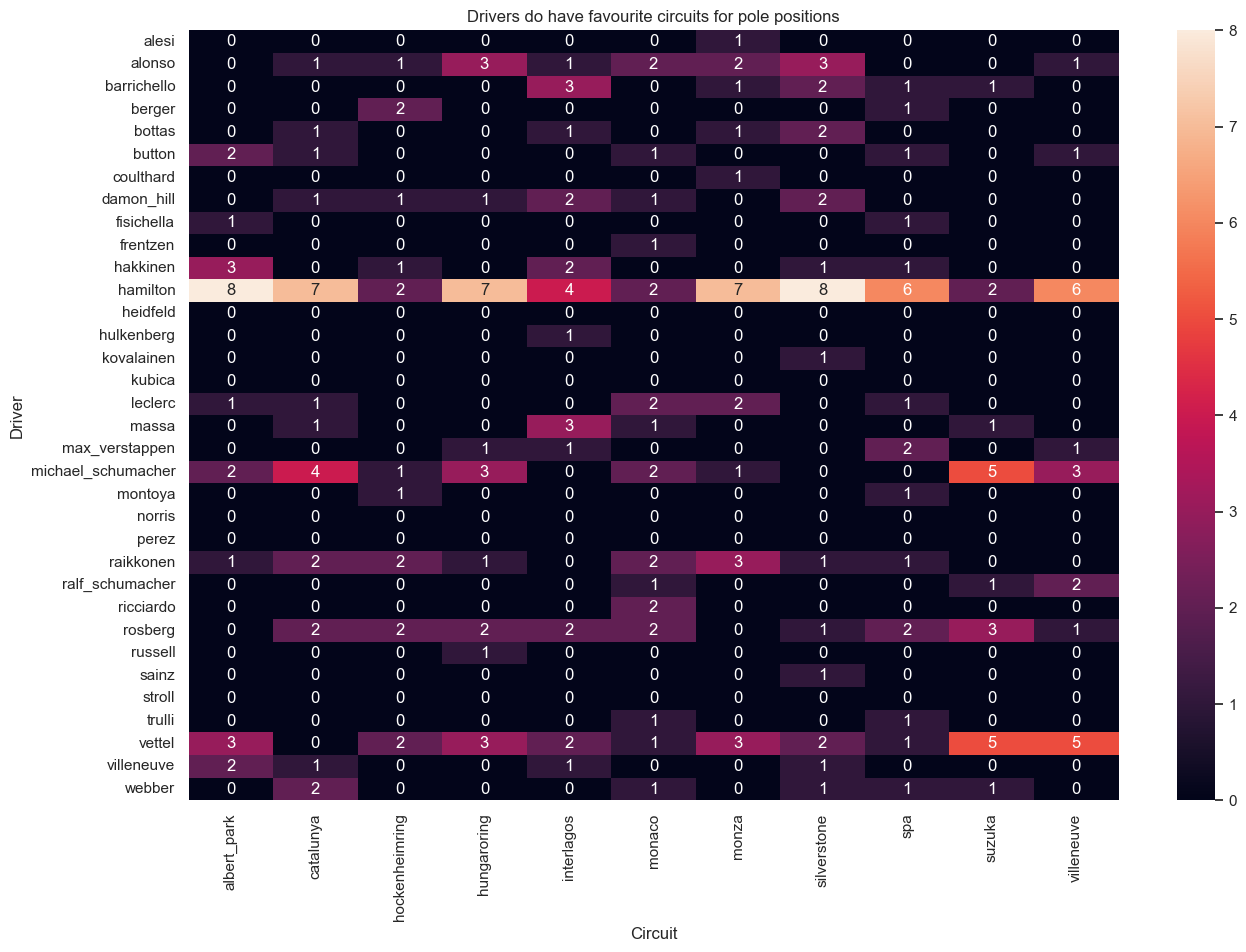

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(temp2,annot=True)
plt.title('Drivers do have favourite circuits for pole positions')
plt.xlabel('Circuit')
plt.ylabel('Driver')
plt.show()

In [25]:
temp3 = temp2[~(temp2==0).all(axis=1)]

In [26]:
stats.chi2_contingency(temp3)

(311.8742129005945,
 0.092273103843006,
 280,
 array([[0.09704641, 0.10126582, 0.06329114, 0.092827  , 0.09704641,
         0.092827  , 0.092827  , 0.10970464, 0.08860759, 0.08016878,
         0.08438819],
        [1.35864979, 1.41772152, 0.88607595, 1.29957806, 1.35864979,
         1.29957806, 1.29957806, 1.53586498, 1.24050633, 1.12236287,
         1.1814346 ],
        [0.77637131, 0.81012658, 0.50632911, 0.74261603, 0.77637131,
         0.74261603, 0.74261603, 0.87763713, 0.70886076, 0.64135021,
         0.67510549],
        [0.29113924, 0.30379747, 0.18987342, 0.27848101, 0.29113924,
         0.27848101, 0.27848101, 0.32911392, 0.26582278, 0.24050633,
         0.25316456],
        [0.48523207, 0.50632911, 0.3164557 , 0.46413502, 0.48523207,
         0.46413502, 0.46413502, 0.54852321, 0.44303797, 0.40084388,
         0.42194093],
        [0.58227848, 0.60759494, 0.37974684, 0.55696203, 0.58227848,
         0.55696203, 0.55696203, 0.65822785, 0.53164557, 0.48101266,
         0.50632

A chi2 test between the two categorical variables of drivers and circuits, counting pole positions. A chi2 test has the null hypothesis that the count of poles over the circuits will be equal for drivers. The alternative hypothesis is that there is a relationship between drivers and circuits.

However, not all drivers drove the same circuit therefore we tested only the circuits all drivers had competed at. This gave a pvalue of 0.09 and therefore we can not reject the null hypothesis

Looking at the heatmap it seems to suggest some drivers have a preference like Michael Schumacher and Vettel at Suzuka. However because lots of drivers only got 1 pole at one track they have a lot of 0's at the other tracks and therefore suggest there is not relationship.

If we repeat the test for drivers with more than 1 pole

In [27]:
drivers2 = list(driverspoles_1_more[driverspoles_1_more>1].index)
temp4 = temp3[temp3.index.isin(drivers2)]

In [28]:
stats.chi2_contingency(temp4)

(256.126635170351,
 0.04770893999131658,
 220,
 array([[1.39393939, 1.45454545, 0.90909091, 1.27272727, 1.33333333,
         1.27272727, 1.27272727, 1.45454545, 1.27272727, 1.15151515,
         1.21212121],
        [0.7965368 , 0.83116883, 0.51948052, 0.72727273, 0.76190476,
         0.72727273, 0.72727273, 0.83116883, 0.72727273, 0.65800866,
         0.69264069],
        [0.2987013 , 0.31168831, 0.19480519, 0.27272727, 0.28571429,
         0.27272727, 0.27272727, 0.31168831, 0.27272727, 0.24675325,
         0.25974026],
        [0.4978355 , 0.51948052, 0.32467532, 0.45454545, 0.47619048,
         0.45454545, 0.45454545, 0.51948052, 0.45454545, 0.41125541,
         0.43290043],
        [0.5974026 , 0.62337662, 0.38961039, 0.54545455, 0.57142857,
         0.54545455, 0.54545455, 0.62337662, 0.54545455, 0.49350649,
         0.51948052],
        [0.0995671 , 0.1038961 , 0.06493506, 0.09090909, 0.0952381 ,
         0.09090909, 0.09090909, 0.1038961 , 0.09090909, 0.08225108,
         0.0865

If we repeat the chi2 test for the drivers with more than 1 pole we can see it reduces and is beneath 0.05 confidence interval. However only marginally. Therefore there could be a relationship between drivers and tracks for pole positions. However it does not seem significant at this stage. This will be investigated further

## Do certain cars prefer different tracks for pole positions?
<a id="tracks"></a>

In [119]:
carspoles = ergast_combined_df.groupby(['constructorRef','circuitRef'])['pole'].sum()
carspoles_1_more=ergast_combined_df.groupby(['constructorRef'])['pole'].sum()
cars = list(carspoles_1_more[carspoles_1_more>1].index)
temp = carspoles.unstack()
car_poles_circuits = temp[temp.index.isin(cars)]

<AxesSubplot: xlabel='circuitRef', ylabel='constructorRef'>

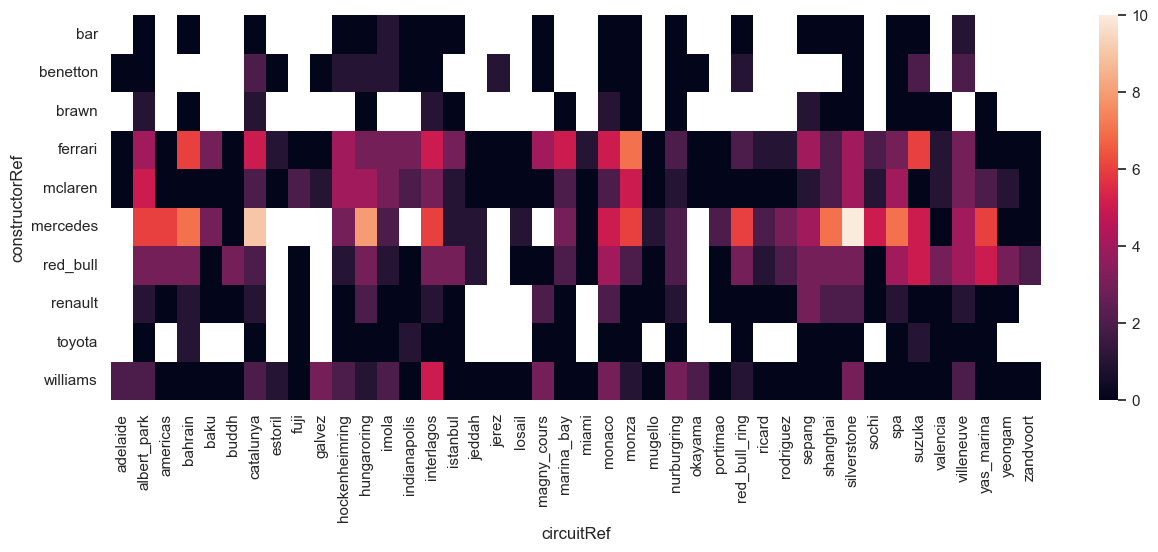

In [121]:
plt.figure(figsize=(15,5))
sns.heatmap(car_poles_circuits)

In [122]:
temp2 =car_poles_circuits.copy()
cirs =list((~temp2.isna().any(axis=0)).index)
vals =list((~temp2.isna().any(axis=0)).values)
inds = [i for i,x in enumerate(vals) if x==True]
keep = [x for i,x in enumerate(cirs) if i in inds]
temp2 = temp2[keep]

<AxesSubplot: xlabel='circuitRef', ylabel='constructorRef'>

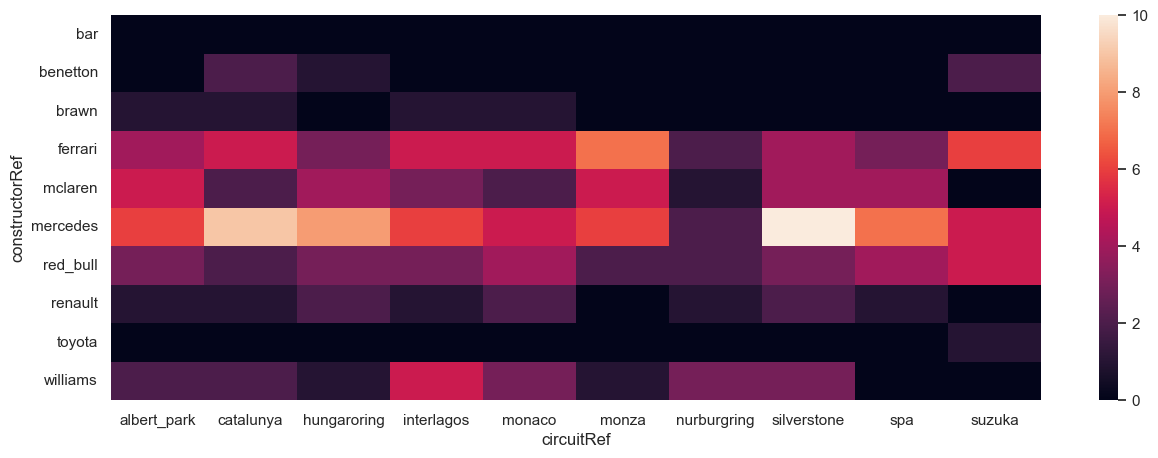

In [123]:
plt.figure(figsize=(15,5))
sns.heatmap(temp2)

In [124]:
stats.chi2_contingency(temp2.drop(index='bar')) # had to drop bar as had 0 on top row

(62.02234186183955,
 0.7930523222412341,
 72,
 array([[0.52380952, 0.57142857, 0.52380952, 0.57142857, 0.52380952,
         0.5       , 0.26190476, 0.61904762, 0.45238095, 0.45238095],
        [0.41904762, 0.45714286, 0.41904762, 0.45714286, 0.41904762,
         0.4       , 0.20952381, 0.4952381 , 0.36190476, 0.36190476],
        [4.60952381, 5.02857143, 4.60952381, 5.02857143, 4.60952381,
         4.4       , 2.3047619 , 5.44761905, 3.98095238, 3.98095238],
        [3.14285714, 3.42857143, 3.14285714, 3.42857143, 3.14285714,
         3.        , 1.57142857, 3.71428571, 2.71428571, 2.71428571],
        [6.7047619 , 7.31428571, 6.7047619 , 7.31428571, 6.7047619 ,
         6.4       , 3.35238095, 7.92380952, 5.79047619, 5.79047619],
        [3.24761905, 3.54285714, 3.24761905, 3.54285714, 3.24761905,
         3.1       , 1.62380952, 3.83809524, 2.8047619 , 2.8047619 ],
        [1.15238095, 1.25714286, 1.15238095, 1.25714286, 1.15238095,
         1.1       , 0.57619048, 1.36190476, 0.9952

On face value it does not seem that there is a significant relationship between tracks and teams. the top teams seem to spread their poles out over the tracks. A chi2 test shows the p value is high and therefore we can not reject the null hypothesis that teams and circuits are independent regarding pole positions

## do drivers do better in their home country?
<a id="homecountry"></a>

In [136]:
driver_home_race = ergast_combined_df.loc[ergast_combined_df['country'] == ergast_combined_df['nationality_drivers'],['driverRef','pole']]

In [137]:
driver_pole_home_race = driver_home_race.groupby(['driverRef'])['pole'].sum()

In [138]:
drivers = list(driverspoles_1_more[driverspoles_1_more>0].index)

In [141]:
drivers_home_percentage = driver_pole_home_race[driver_pole_home_race.index.isin(drivers)]/poles_circuits.sum(1)

In [142]:
drivers_home_percentage =drivers_home_percentage.dropna()
drivers_home_percentage = drivers_home_percentage.reset_index()
drivers_home_percentage.columns=['driverRef','polepercent']


In [143]:
drivers2= drivers_home_percentage['driverRef']
driver_pole_home_race_sum = driver_pole_home_race[driver_pole_home_race.index.isin(drivers2)]

In [144]:
driver_pole_home_race_sum=driver_pole_home_race_sum.reset_index()
driver_pole_home_race_sum.columns=['driverRef','polesum']

In [145]:
driver_home_race_plot = driver_pole_home_race_sum.merge(drivers_home_percentage,on='driverRef')

In [146]:
#driver_home_race_plot=driver_home_race_plot.set_index('driverRef')

In [147]:
data= driver_home_race_plot.melt(id_vars='driverRef')

Text(0, 0.5, 'Drivers')

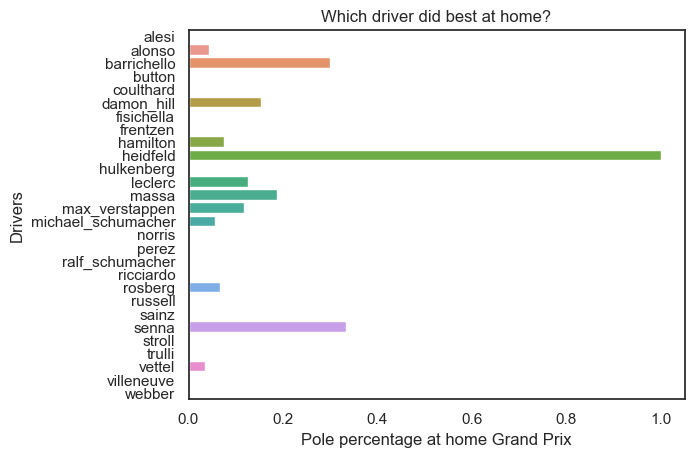

In [148]:
plt.title('Which driver did best at home?')
sns.barplot(data=drivers_home_percentage,y='driverRef',x='polepercent')
plt.xlabel('Pole percentage at home Grand Prix')
plt.ylabel('Drivers')

<AxesSubplot: xlabel='polesum', ylabel='driverRef'>

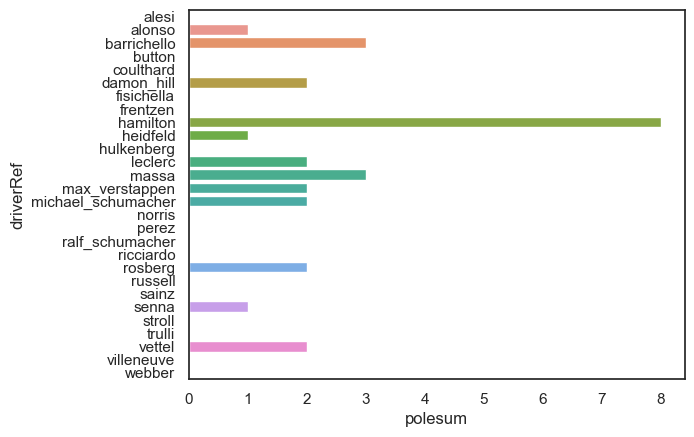

In [149]:
sns.barplot(data=driver_pole_home_race_sum,y='driverRef',x='polesum')

Hamilton has the most home poles at Silverstone, but a low home pole percentage. Barrichello and Senna did well at home with 30% of poles at home. Heidfeld got 1 pole in his career which was at home

In [150]:
stats.chisquare(driver_pole_home_race_sum.set_index('driverRef'))

Power_divergenceResult(statistic=array([76.24137931]), pvalue=array([1.38336214e-06]))

The CHi2 Pvalue is very low so therefore we can reject the null hypothesis and suggest that home race does play an advantage in getting pole position

## Does Age Matter for getting Pole Position?
<a id="age"></a>

In [151]:
ergast_combined_df['dob']=ergast_combined_df['dob'].astype('datetime64')
ergast_combined_df['date'] =ergast_combined_df['date'].astype('datetime64')

In [152]:
# inspired from stackoverflow https://stackoverflow.com/questions/26788854/pandas-get-the-age-from-a-date-example-date-of-birth
ergast_combined_df['age']=(ergast_combined_df['date'] - ergast_combined_df['dob']).astype('<m8[Y]')

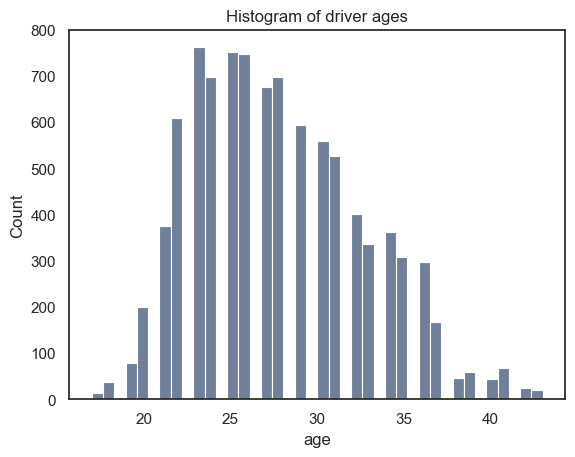

In [153]:
plt.figure()
sns.histplot(data=ergast_combined_df,x='age')
plt.title('Histogram of driver ages')
plt.show()

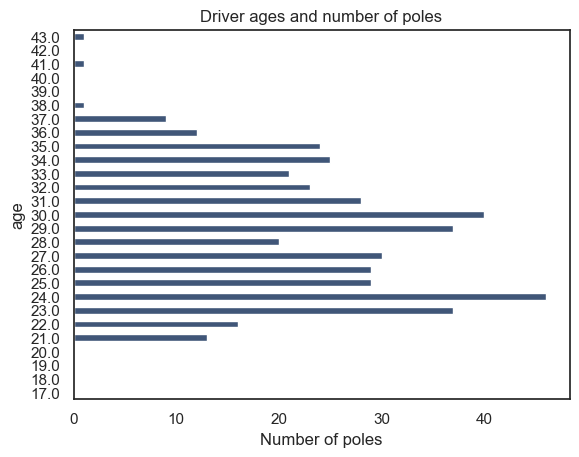

In [154]:
plt.figure()
ergast_combined_df.groupby(['age'])['pole'].sum().plot(kind='barh')
plt.title('Driver ages and number of poles')
plt.xlabel('Number of poles')
plt.show()

The number of poles with age seems to match the histogram of age very well indicating that the average driver age is 25 which also has the most poles. However there is a second peak at 30 which could indicate that older drivers as they mature are more likely to get pole position. 

statistical test

In [155]:
stats.chisquare(ergast_combined_df.groupby(['age'])['pole'].sum())

Power_divergenceResult(statistic=354.8054298642534, pvalue=1.9606298295295917e-59)

## Is there a correlation between grid and pole position?
<a id="grid"></a>

In [126]:
(ergast_combined_df['grid'].isna()).sum()

10

In [127]:
(ergast_combined_df['positionOrder'].isna()).sum()

10

In [128]:
ergast_combined_df.loc[ergast_combined_df['positionOrder'].isna(),['grid','positionOrder']]

,grid,positionOrder
4429,NaN,NaN
4430,NaN,NaN
6124,NaN,NaN
6125,NaN,NaN
8460,NaN,NaN
8461,NaN,NaN
8927,NaN,NaN
8928,NaN,NaN
9070,NaN,NaN
9071,NaN,NaN


In [129]:
len(ergast_combined_df)

9455

In [130]:
len(ergast_combined_df['positionOrder'].dropna())

9445

In [131]:
ergast_combined_df['positionOrder'].dropna().index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9445, 9446, 9447, 9448, 9449, 9450, 9451, 9452, 9453, 9454],
           dtype='int64', length=9445)

In [132]:
ergast_combined_df_grid_no_nan = ergast_combined_df.iloc[ergast_combined_df['positionOrder'].dropna().index]

Pearsonsr Statistical Correlation Test:
-----------------
grid pearsonsr correlation test against positionOrder : 
 PearsonRResult(statistic=0.5397644157372334, pvalue=0.0)

------------------


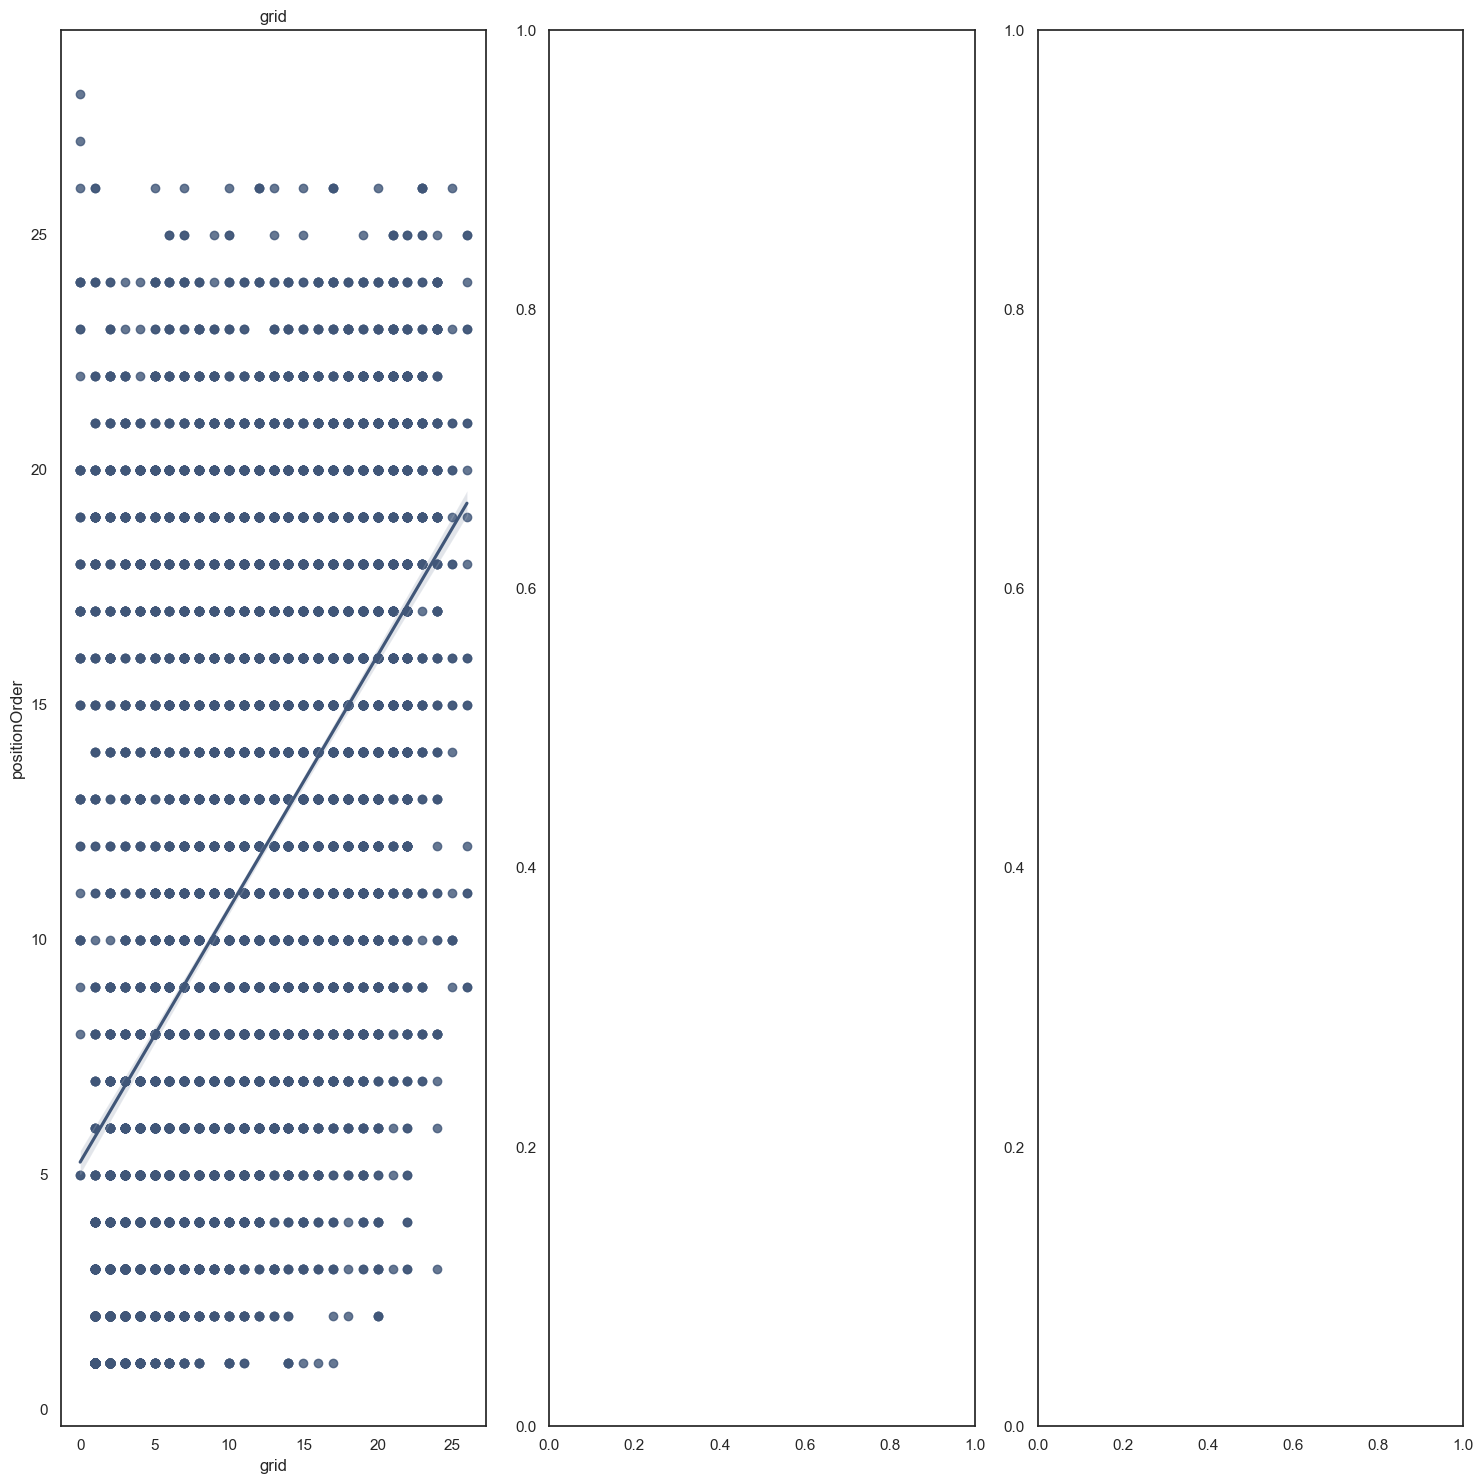

In [133]:
ds_ultils.correlation_test(ergast_combined_df_grid_no_nan,['grid'],'positionOrder')

There is a correlation of 0.6 between the grid position and race result. This highlights the importance of getting a good position on the grid as it can help drivers and teams maximise points for the race. The p value of the pearson r correlation test is less than 0.05. Therefore we can reject the Null hypothesis that grid and position in the race are not related

number of samples : 9445


c:\Users\ben44\.conda\envs\Formula1\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test: ShapiroResult(statistic=0.9645418524742126, pvalue=5.310921179791057e-43)
----------
can reject null hypothesis and data may not be normally distributed

Sample size is greater than 100 
 therefore as per Central Limit Theorem reasonable to assume underlying population will be normal

Plots


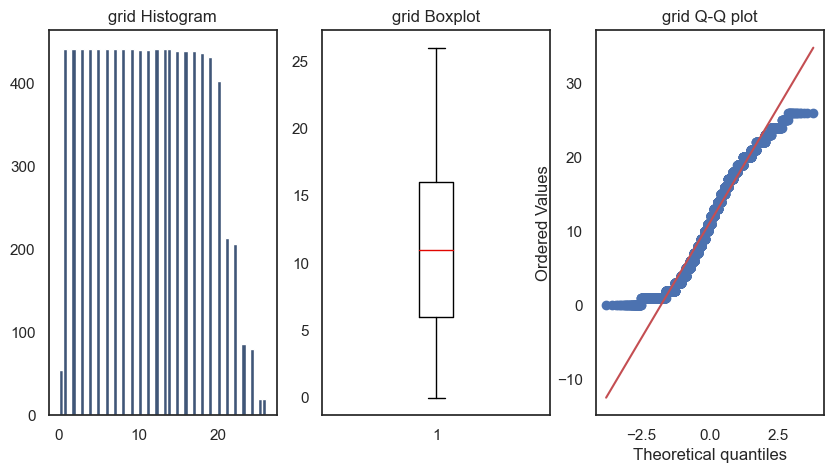

number of samples : 9445
Shapiro-Wilk test: ShapiroResult(statistic=0.9630985856056213, pvalue=1.2191296639625909e-43)
----------
can reject null hypothesis and data may not be normally distributed

Sample size is greater than 100 
 therefore as per Central Limit Theorem reasonable to assume underlying population will be normal

Plots


c:\Users\ben44\.conda\envs\Formula1\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


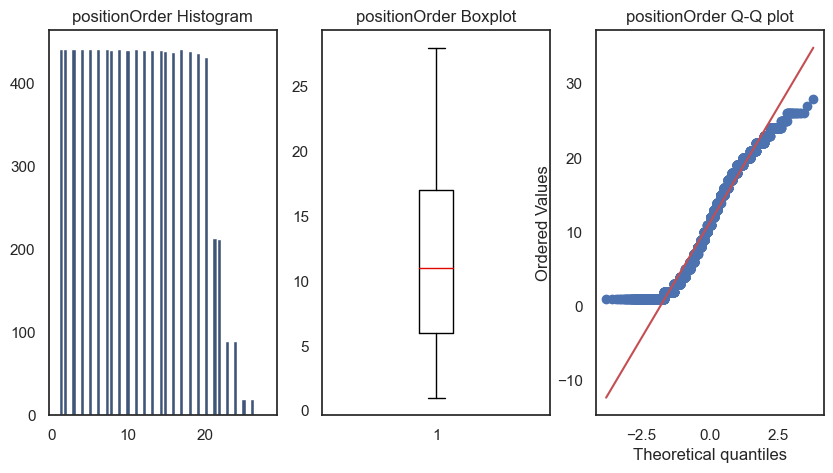

In [134]:
ds_ultils.normaility_check(ergast_combined_df_grid_no_nan,['grid','positionOrder'])